### Sentiment Analysis (Twitter Feed)

In [2]:
!pip install snscrape

     ---------------------------------------- 59.1/59.1 kB 1.6 MB/s eta 0:00:00


In [4]:
!pip install textblob 

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00


In [5]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

### Scrape Tweets

In [22]:
# Create a list to append tweet data
tweets_list = []
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('crypto since:2020-01-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])

In [23]:
tweets_to_df.head(10)

,Tweets
0,@DidiViewing @KeithMcCullough May be too. I fi...
1,@doge_bud @elonmusk Sorry I don’t understand w...
2,I could never imagine joining Twitter. Until...
3,"From 2008 until today, crypto has managed to b..."
4,Rug pulls are the most common scam in crypto a...
5,Literally NEVER heard of Toncoin until today a...
6,Amazing crypto community!! Thank you so much. ...
7,The opening scene of Clerks III absolutely shi...
8,@aeyakovenko Never heard of it until today. Gi...
9,SAITAMA token is one of the biggest scams perf...


### Cleaning the tweets

In [11]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original tweets with cleaned Tweets

,Tweets,cleanedTweets
0,The opening scene of Clerks III absolutely shi...,The opening scene of Clerks III absolutely shi...
1,@aeyakovenko Never heard of it until today. Gi...,Never heard of it until today. GitHub says mo...
2,SAITAMA token is one of the biggest scams perf...,SAITAMA token is one of the biggest scams perf...
3,@CaptTK13 @ThePhunky1 @Buddies_St @TheKiltMast...,We have a similar list. But still...
4,@ZenGo My scariest moment in crypto was LUNA c...,My scariest moment in crypto was LUNA crash. ...


In [12]:
#  save the cleaned tweets to a .csv file and load them into the notebook

tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

In [14]:
# Detect sentiments
# get subjectivity and polarity of tweets with a function

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,cleanedTweets,Subjectivity,Polarity
0,The opening scene of Clerks III absolutely shi...,0.668000,0.112000
1,Never heard of it until today. GitHub says mo...,0.333333,0.166667
2,SAITAMA token is one of the biggest scams perf...,0.750000,0.450000
3,We have a similar list. But still...,0.400000,0.000000
4,My scariest moment in crypto was LUNA crash. ...,0.213333,0.086667


We use a library called __TextBlob__ to detect the subjectivity or polarity of a tweet. 

It uses __Natural Language ToolKit (NLTK)__. 

- __Subjectivity__ shows the amount of personal opinion in a sentence. Its score lies between 0 and 1. If a tweet has high subjectivity i.e. close to 1, it means the tweet contains more of a personal opinion than factual information. 
- The __polarity__ score lies between (-1 to 1) where -1 identifies the most negative words and 1 identifies the most positive words.

In [16]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets.head()

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
0,The opening scene of Clerks III absolutely shi...,The opening scene of Clerks III absolutely shi...,0.668000,0.112000,Positive
1,@aeyakovenko Never heard of it until today. Gi...,Never heard of it until today. GitHub says mo...,0.333333,0.166667,Positive
2,SAITAMA token is one of the biggest scams perf...,SAITAMA token is one of the biggest scams perf...,0.750000,0.450000,Positive
3,@CaptTK13 @ThePhunky1 @Buddies_St @TheKiltMast...,We have a similar list. But still...,0.400000,0.000000,Neutral
4,@ZenGo My scariest moment in crypto was LUNA c...,My scariest moment in crypto was LUNA crash. ...,0.213333,0.086667,Positive


In [17]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    593
Neutral     216
Negative    192
Name: Analysis, dtype: int64

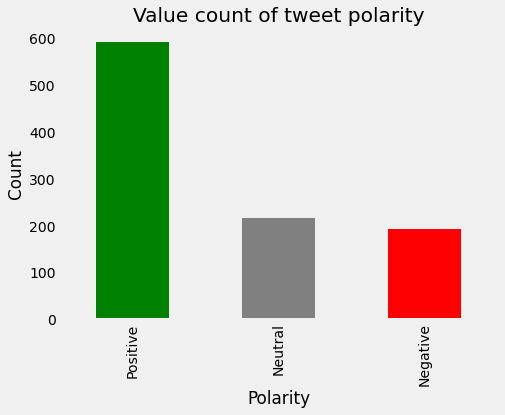

In [26]:
# Plot a bar graph and pie chart for each polarity

#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

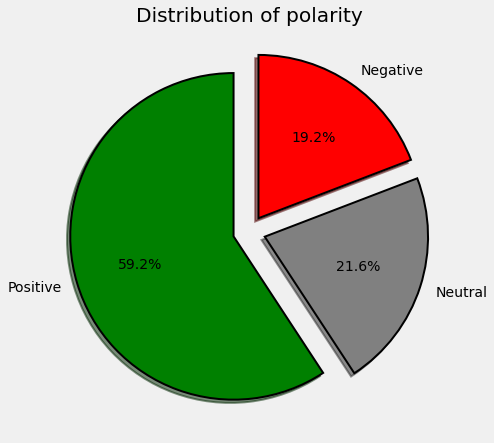

In [19]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

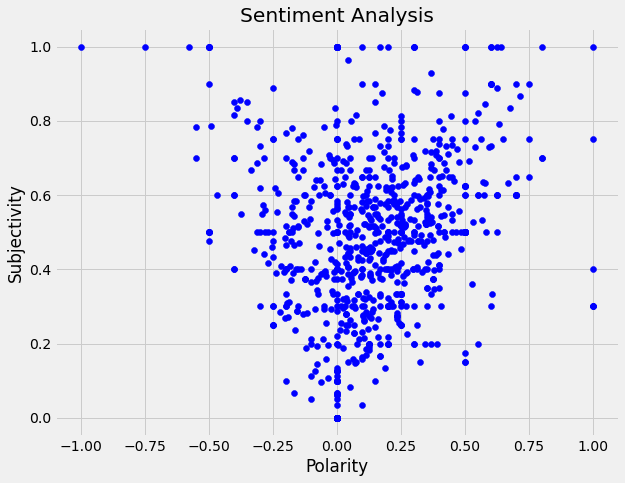

In [20]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

#### Create a word cloud function for both ***__positive__*** and ***__negative__*** tweets.

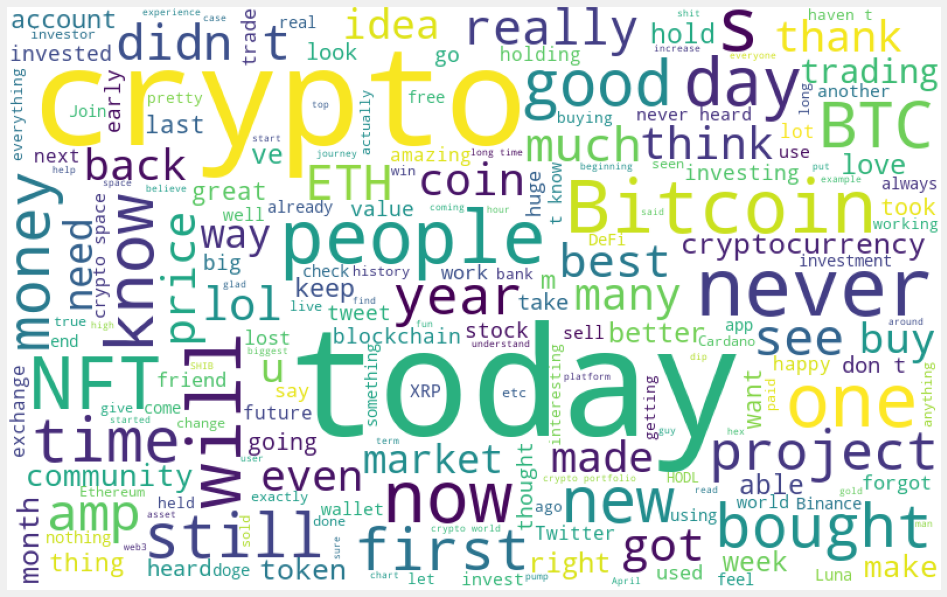

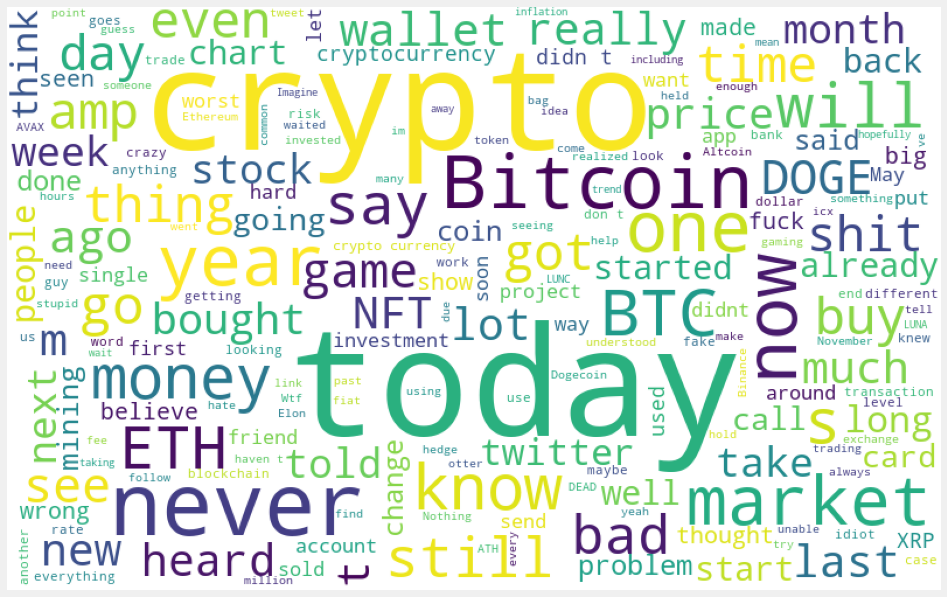

In [21]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)